# Статистический анализ данных популярного сервиса аренды самокатов GoFast

Цели и задачи работы: 
- Проанализировать и визуализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Ход работы:
- Первый этап - загрузка данных, первичный анализ, обнаружение неполадок с данными(дубликаты, пропуски).

- Второй этап - предобработка данных, устранение(удаление дубликатов) проблем выявленных на первом этапе.

- Третий этап - исследовательский анализ данных, описание и визуализация общей информации о пользователях и поездках.

- Четвертый этап - объединение данных, объедините данные о пользователях, поездках и подписках в один датафрейм, разбиение данных на две группы(пользователи с подпиской и без), визуализация.

- Пятый этап - подсчёт выручки, нахождение суммарного расстояния, количества поездок и суммарное время для каждого пользователя за каждый месяц, помесячной выручки(для пользователей с подпиской и без).

- Шестой этап - проверка 4 гипотез.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom, poisson

#### Шаг 1. Загрузка данных

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra    user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28   subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Nu

array([[<AxesSubplot:title={'center':'minute_price'}>,
        <AxesSubplot:title={'center':'start_ride_price'}>],
       [<AxesSubplot:title={'center':'subscription_fee'}>,
        <AxesSubplot:>]], dtype=object)

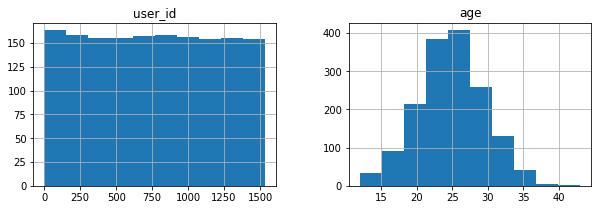

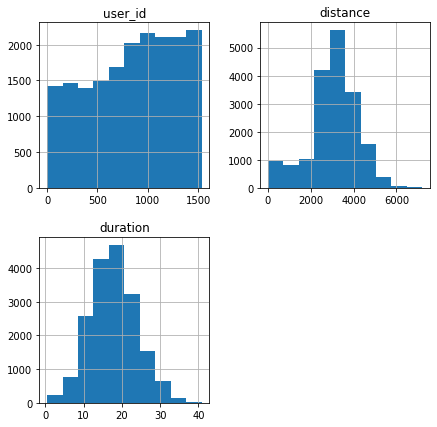

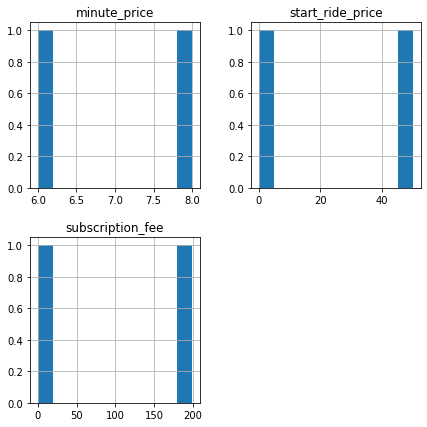

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

display(data_users, data_rides, data_subscriptions)

print(data_users.head(), data_rides.head(), data_subscriptions.head())

data_users.info()
data_rides.info()
data_subscriptions.info()

data_users.hist(figsize=(10, 3))
data_rides.hist(figsize=(7, 7))
data_subscriptions.hist(figsize=(7, 7))

кстати, уже на это этапе можно увидеть что все данные распределены по разному(биномиально, нормально, по Бернулли и т.д.). все данные успешно загружены и с ними можно работать.

Критических проблем не было обнаружено. В данных отсутствуют пропуски, в датафрэйме с поездками нужно привести столбец date к типу даты pandas.

#### Шаг 2. Предобработка данных

In [3]:
#2.1
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')
#2.2
data_rides['month'] = data_rides['date'].dt.month
#print(data_rides['month'])
#2.3
def uniq(data):
    print(data.isnull().sum())
    print('количество дубликатов', data.duplicated().sum())
uniq(data_users)
uniq(data_rides) 
uniq(data_subscriptions)




user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
количество дубликатов 31
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64
количество дубликатов 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
количество дубликатов 0


ура, спасибо большое, что пропущенных значений нет). НО есть дубликаты в первом датафрэйме, исправляем >>> 

In [4]:
data_users = data_users.drop_duplicates()
uniq(data_users)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
количество дубликатов 0


вывод к шагу 2
- данные выгружены
- пропусков нет
- дубликаты удалены

#### Шаг 3. Исследовательский анализ данных

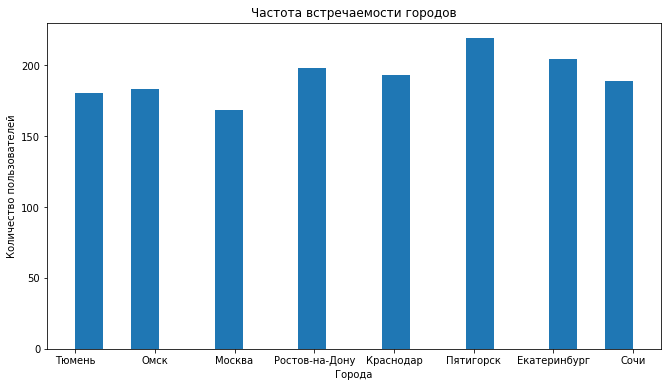

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [5]:
#3.1
city = data_users['city']
plt.figure(figsize=(11, 6))
plt.hist(city, bins=20, range=(0,7))
plt.title('Частота встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Количество пользователей')
plt.show()
table_city = data_users.pivot_table(index='city', values='user_id', aggfunc = 'count')
display(table_city.sort_values(by='user_id', ascending=False))

Из восьми представленных городов в таблице, лидирующее место по количеству пользователей занимает Пятигорск. Москва имеет меньшее из всей выборки число пользоваетелей.

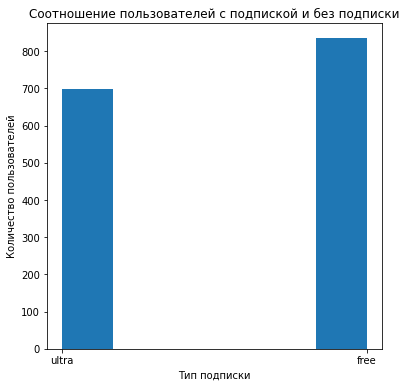

,user_id
subscription_type,
free,835
ultra,699


Доля пользователей с подпиской:  45.6 %
Доля пользователей без подписки:  54.4 %


In [6]:
#3.2
subscription = data_users['subscription_type']
plt.figure(figsize=(6, 6))
plt.hist(subscription, bins=6)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.show()
table_subscription = data_users.pivot_table(index='subscription_type', values='user_id', aggfunc = 'count')
display(table_subscription.sort_values(by='user_id', ascending=False))

# считаю разбивку пользователей по тарифам в долях
# users_total = data_users['subscription_type'].value_counts()
# print(users_total)
share_free = 835
share_ultra = 699
count_users = share_free + share_ultra
print('Доля пользователей с подпиской: ', round((share_ultra/count_users)*100, 1), '%')
print('Доля пользователей без подписки: ', round((share_free/count_users)*100, 1), '%')

По гистограмме видим, что пользователей без подписки больше. С подпиской 699(45.6 %), без - 835(54.4 %) пользователей.

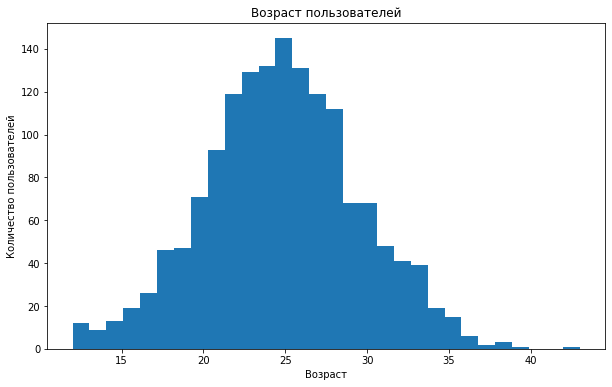

,user_id
age,
25,145
24,132
26,131
23,129
27,119
22,119
28,112
21,93
20,71


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


In [7]:
#3.3
age = data_users['age']
plt.figure(figsize=(10, 6))
plt.hist(age, bins=30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()
table_age = data_users.pivot_table(index='age', values='user_id', aggfunc = 'count')
display(table_age.sort_values(by='user_id', ascending=False))
print(age.describe())

Возраст, как мы видим распределен нормально, сервис имеет популярность больше всего у 25 летних пользователей , медиана не сильно отличается от среднего.

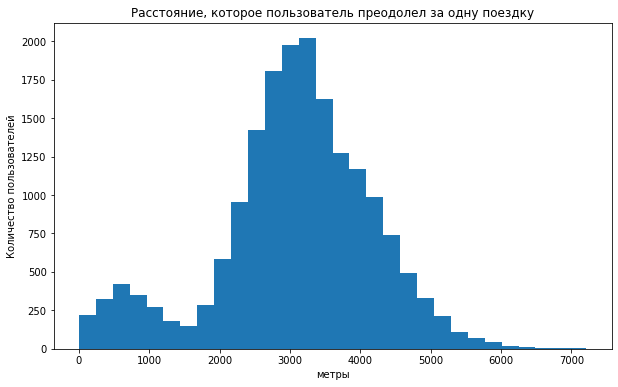

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


In [8]:
#3.4
distance = data_rides['distance']
plt.figure(figsize=(10, 6))
plt.hist(distance, bins=30)
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('метры')
plt.ylabel('Количество пользователей')
plt.show()
#Думаю, тут не имеет смысла строить сводную таблицу)
print(distance.describe())

Среднее расстояние предолеваемое пользователем состовляет примерно 3км. Ну еще есть небольшой всплеск около 500-600 метров(не могу предположить с чем он связан), возможно эти люди преодолевали такое маленькое расстояние потому что только учились ездить на электрических самокатах.

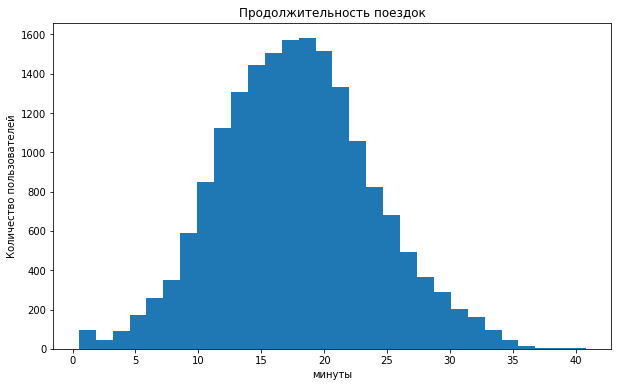

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


In [9]:
#3.5
duration = data_rides['duration']
plt.figure(figsize=(10, 6))
plt.hist(duration, bins=30)
plt.title('Продолжительность поездок')
plt.xlabel('минуты')
plt.ylabel('Количество пользователей')
plt.show()
#Думаю, тут не имеет смысла строить сводную таблицу)
print(duration.describe())

Средняя продожительность поездок составляет примерно чуть больше 17 минут.

Вывод к шагу 3:
- Из восьми представленных городов в таблице, лидирующее место по количеству пользователей занимает Пятигорск. Москва имеет меньшее из всей выборки число пользоваетелей.
- По гистограмме видим, что пользователей без подписки больше. С подпиской(45.6%) 699, без(54.4%) - 835 пользователей.
- Возраст, как мы видим распределен нормально, сервис имеет популярность больше всего у 25 летних пользователей , медиана не сильно отличается от среднего.
- Среднее расстояние предолеваемое пользователем состовляет примерно 3км. Ну еще есть небольшой всплеск около 500-600 метров(не могу предположить с чем он связан), возможно эти люди преодолевали такое маленькое расстояние потому что только учились ездить на электрических самокатах.
- Средняя продожительность поездок составляет примерно чуть больше 17 минут.

#### Шаг 4. Объединение данных

In [10]:
#4.1
data0 = data_users.merge(data_rides, on='user_id', how='left')
data = data0.merge(data_subscriptions, on='subscription_type', how='left')
display(data)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [11]:
#4.2
data_free = data[data['subscription_type'] == 'free']
display(data_free)

data_ultra = data[data['subscription_type'] == 'ultra']
display(data_ultra)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


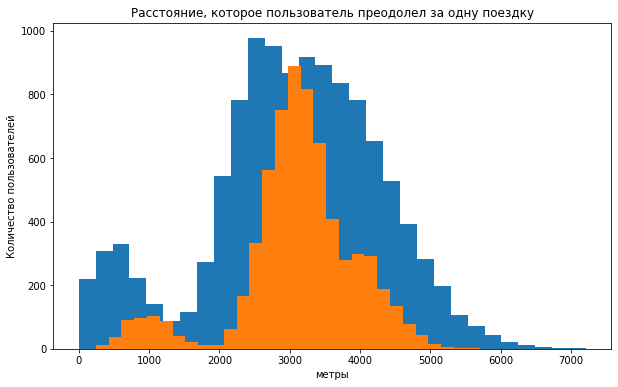

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64
count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


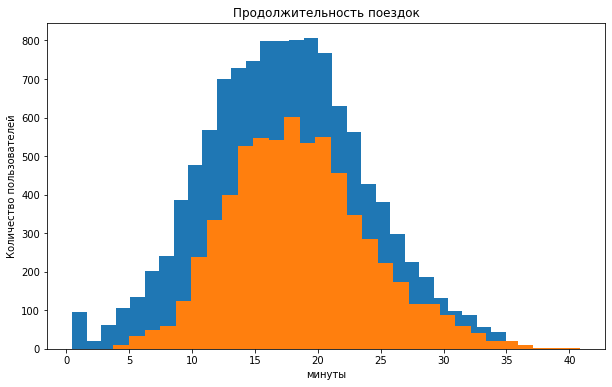

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64
count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


In [12]:
#4.3
distance_free = data_free['distance']
distance_ultra = data_ultra['distance']
plt.figure(figsize=(10, 6))
plt.hist(distance_free, bins=30)
plt.hist(distance_ultra , bins=30)
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('метры')
plt.ylabel('Количество пользователей')
plt.show()
print(distance_free.describe())
print(distance_ultra.describe())

duration_free = data_free['duration']
duration_ultra = data_ultra['duration']
plt.figure(figsize=(10, 6))
plt.hist(duration_free, bins=30)
plt.hist(duration_ultra, bins=30)
plt.title('Продолжительность поездок')
plt.xlabel('минуты')
plt.ylabel('Количество пользователей')
plt.show()
print(duration_free.describe())
print(duration_ultra.describe())

Вывод к шагу 4:
- Обьеденили все данные
- Разбили данные на две категории пользователей(с подпиской и без)
- По построенным гистограмам можно сказать, что среднее значение дистанции и продолжительности поездок у пользователей с подпиской и без, мало различаются(~70м и ~1мин).

#### Шаг 5. Подсчёт выручки

In [13]:
#5.1
# каждое значение из столбца duration округляется с помощью «потолка»: 
data['duration'] = np.ceil(data['duration'])
data['duration'] = data['duration'].astype('int')
display(data)
data_sum = data.pivot_table(index=['user_id', 'month'], values=['distance', 'duration'], aggfunc = ['count', 'sum'])
data_sum.drop(data_sum.columns[1], axis= 1 , inplace= True )
data_sum.columns = ['count_distance', 'sum_distance', 'sum_duration']
data_sum = data_sum.reset_index()
display(data_sum)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,11,8,50,0


,user_id,month,count_distance,sum_distance,sum_duration
0,1,1,2,7027.511294,42
1,1,4,1,754.159807,7
2,1,8,2,6723.470560,46
3,1,10,2,5809.911100,32
4,1,11,3,7003.499363,56
...,...,...,...,...,...
11326,1534,6,2,3409.468534,26
11327,1534,8,2,7622.453034,48
11328,1534,9,1,4928.173852,23
11329,1534,11,4,13350.015305,78


In [14]:
#5.2
data_final = data_sum.merge(data_users, how='left', on='user_id')
data_final = data_final.merge(data_subscriptions, how='left', on='subscription_type')

# исправляю расчеты помесячной выручки
def revenue(row):
  revenue = 0
  revenue = (row['start_ride_price'] * row['count_distance'] + row['minute_price'] * row['sum_duration'] + row['subscription_fee'])
    
  return revenue

data_final['revenue'] = data_final.apply(revenue, axis=1)
data_sum['revenue'] = data_final['revenue']
display(data_final)
display(data_sum)


# предыдущий неправельный код 
# data_final['revenue'] = data_final['start_ride_price'] * data_final['count_distance'] + data_final['minute_price'] * data_final['sum_duration'] + data['subscription_fee']
# data_sum['revenue'] = data_final['revenue']
# #data_final = data_final.drop(columns='revenue')
# display(data_sum)
# display(data_final)

free_mean = data_final[data_final['subscription_type'] == 'free']['revenue'].mean()
ultra_mean = data_final[data_final['subscription_type'] == 'ultra']['revenue'].mean()
print(free_mean, ultra_mean)

,user_id,month,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199,451
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199,241
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199,475
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199,391
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0,308
11327,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0,484
11328,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0,234
11329,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0,824


,user_id,month,count_distance,sum_distance,sum_duration,revenue
0,1,1,2,7027.511294,42,451
1,1,4,1,754.159807,7,241
2,1,8,2,6723.470560,46,475
3,1,10,2,5809.911100,32,391
4,1,11,3,7003.499363,56,535
...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26,308
11327,1534,8,2,7622.453034,48,484
11328,1534,9,1,4928.173852,23,234
11329,1534,11,4,13350.015305,78,824


328.6413651073845 362.7921906022502


Вывод к шагу 5:
- Посчитано суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Посчитана помесячная выручка, которую принёс каждый пользователь.
- Сформирована сводная таблица(count_distance - количество поездок, sum_distance - суммарное расстояние за месяц, sum_duration - суммарная продолжительность поездки, revenue - выручка ежемесяная с каждого пользователя).

#### Шаг 6. Проверка гипотез

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative).-(Спринт 7/23 → Тема 7/9: Проверка гипотез → Урок 11/14)

Нулевая гипотеза - средняя продолжительность поездок у пользователей с подпиской и без одинокавы

Альтернативная гипотеза - пользователи с подпиской тратят больше времени на поездки

In [15]:
#6.1
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

# вообще используем alternative = 'greater', потому что, Аргумент 'greater' может использоваться для проверки 
# альтернативной гипотезы «Среднее значение первой генеральной совокупности больше среднего значения второй генеральной совокупности».
# (Спринт 7/23 → Тема 7/9: Проверка гипотез → Урок 11/14)
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Первый вывод: пользователи с подпиской тратят больше времени на поездки, следовательно, пользователи с подпиской могут быть «выгоднее» для компании.

ГИПОТЕЗЫ ДО ИСПРАВЛЕНИЯ

Нулевая гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку составлет 3130 метров

Альтернативная гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше
3130 метров


ГИПОТЕЗЫ ПОСЛЕ ИСПРАВЛЕНИЯ

Нулевая гипотеза - Среднее расстояние поездок пользователей с подпиской 'ultra' (меньше или равна) <=3130 м

Альтернативная гипотеза - Среднее расстояние поездок с использованием подписки 'ultra' более 3130 метров

In [16]:
#6.2
interested_value = 3130

alpha = 0.05 # уровень статистической значимости
            # можно указать .05 или 0.05
#для проверки двусторонней гипотезы о равенстве среднего генеральной совокупности
# некоторому значению используют метод scipy.stats.ttest_1samp(a, popmean, alternative).

# изменила параметр с less на greater
results = st.ttest_1samp(
   data_ultra['distance'], 
    interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Второй вывод: Опровергнуть нулевую гипотезу не удалось, значит, среднее расстояние поездок с использованием подписки ‘ultra’ (меньше или) равно 3130 метров.

Нулевая гипотеза -  помесячная выручка от пользователей с подпиской по месяцам и выручка от пользователей без подписки одинаковы

Альтернативная гипотеза -  помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [17]:
#6.3
display(data_final[['user_id', 'subscription_type', 'revenue']])
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

free = data_final[data_final['subscription_type'] == 'free']
ultra = data_final[data_final['subscription_type'] == 'ultra']

results = st.ttest_ind(ultra['revenue'], free['revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print('Выручка от пользователей с подпиской - ', round(ultra['revenue'].mean(),2))
print('Выручка от пользователей без подписки - ', round(free['revenue'].mean(),2))

,user_id,subscription_type,revenue
0,1,ultra,451
1,1,ultra,241
2,1,ultra,475
3,1,ultra,391
4,1,ultra,535
...,...,...,...
11326,1534,free,308
11327,1534,free,484
11328,1534,free,234
11329,1534,free,824


p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу
Выручка от пользователей с подпиской -  362.79
Выручка от пользователей без подписки -  328.64


Третий вывод: УРААА, нулевая гипотеза отвергнута, а значит можно говорить о том, что помесячная выручка от пользователя с подпиской больше, чем у пользователя без подписки.

Ответ на шаг 6.4
Нам нужно проверить гипотезу, анализируя одну генеральную совокупность, с которой произошли некоторые изменения. В этом случае мы будем проверять, равны ли средние совокупности до и после этого изменения.
Следовательно сюда нам понадобился бы для проверки этой гипотезы, тест (scipy.stats.ttest_rel()) проверки Гипотезы о равенстве средних для зависимых (парных) выборок.

Общий вывод:
Первым шагом были выгружены и проверены на целостность данные, с которыми проводилась работа.

Вторым шагом проведена предобработка на которой выявилось, что данные довольно чистые, пропусков не было обнаружено, а дубликаты были найдены и удалены.

Третьим шагом стал исследовательский анализ, после которого были сделаны такие выводы:

- Из восьми представленных городов в таблице, лидирующее место по количеству пользователей занимает Пятигорск. Москва имеет меньшее из всей выборки число пользоваетелей.
- По гистограмме видим, что пользователей без подписки больше. С подпиской(45.6%) 699, без(54.4%) - 835 пользователей.
- Возраст, как мы видим распределен нормально, сервис имеет популярность больше всего у 25 летних пользователей , медиана не сильно отличается от среднего.
- Среднее расстояние предолеваемое пользователем состовляет примерно 3км. Ну еще есть небольшой всплеск около 500-600 метров(не могу предположить с чем он связан), возможно эти люди преодолевали такое маленькое расстояние потому что только учились ездить на электрических самокатах.
- Средняя продожительность поездок составляет примерно чуть больше 17 минут.

Четвертым шагом я обьеденила все данные в одну таблицу и разделила данные на две категории(пользователи с подпиской и без). После построения гистограмам выяснилось, что среднее значение дистанции и продолжительности поездок у пользователей с подпиской и без, мало различаются(~70м и ~1мин).

Пятый шаг - были осуществлены следующие расчеты и построена следующая таблица:

- Посчитано суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Посчитана помесячная выручка, которую принёс каждый пользователь.
- Сформирована сводная таблица(count_distance - количество поездок, sum_distance - суммарное расстояние за месяц, sum_duration - суммарная продолжительность поездки, revenue - выручка ежемесяная с каждого пользователя).

Шестым шагом проверялись гипотезы, выяснилось следующее:

- продолжительность поездок пользователей с подпиской больше, чем у пользователей без подписки.
- средняя дистанция пользователя с подпиской меньше или равна 3130 м
- помесячная выручка от пользователя с подпиской больше, чем у пользователя без подписки.